In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
import DataA


# Big Moon Data

In [2]:
D = np.load("big_moonfinal.npz")["volts"]
T = np.load("big_moonfinal.npz")["time"]

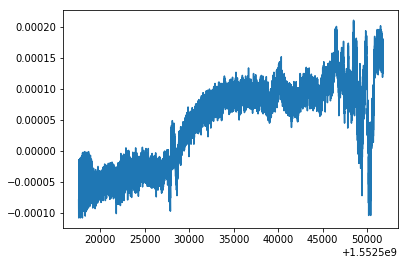

In [3]:
plt.plot(T,D)
plt.show()

In [4]:
Sig = np.fft.fft(D)
n = len(D)
timestep = 1 #second
freq = np.fft.fftfreq(n, d=timestep)


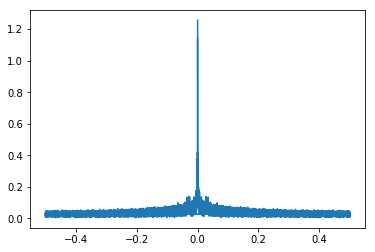

In [5]:
plt.plot(freq,abs(Sig)**0.5)

In [6]:
V_spec = np.fft.fft(D)
P_moon = abs(V_spec)**2
sampling_freq = 1 #Hz
f = np.fft.fftfreq(len(D),1/sampling_freq)


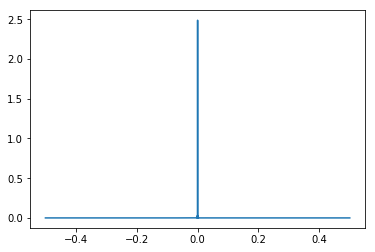

In [7]:
#%matplotlib notebook
plt.plot(np.fft.fftshift(f),np.fft.fftshift(P_moon))

In [8]:
V_filtered = V_spec
for i in range (0,len(P_moon)):
    if (f[i]>-0.04) and (f[i]<-0.02):
        V_filtered[i] = V_spec[i]
    if (f[i]<0.04) and (f[i]>0.02):
        V_filtered[i] = V_spec[i]
    else:
        V_filtered[i] = 0

/Users/costassoler/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


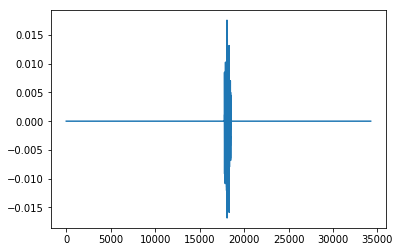

In [9]:
plt.plot(np.fft.fftshift(V_spec))

In [10]:
v_filtered = np.fft.ifft(V_spec)

In [11]:
T[0]+9200

1552526757.014736

/Users/costassoler/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


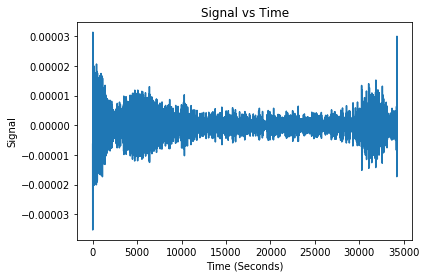

In [12]:
plt.plot(T-T[0],v_filtered)
plt.title('Signal vs Time')
plt.xlabel('Time (Seconds)')
plt.ylabel('Signal')

plt.savefig('SigVsTime.pdf')
plt.show()

# Calculating Range of Fringe Frequencies

Text(0.5,0,'Hour Angle')

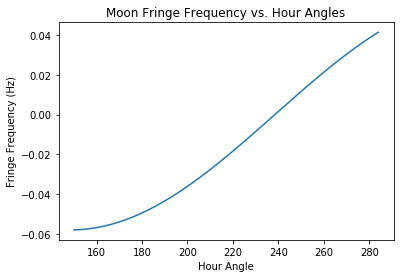

In [13]:
RaStart = (15-5)*180//12
RaEnd = (24-5)*180//12
HA = np.arange(RaStart,RaEnd)
B = 20
lam = (3*10**8)/(10.7*10**9)
delta = 18*(np.pi/180) #degrees
L = 37.87*(np.pi/180)
hs = HA*(np.pi/180) #noon
ff = (B/lam)*np.cos(delta)*np.cos(hs) - (B/lam)*np.sin(L)*np.cos(delta)*np.sin(hs)
F = ff*2*np.pi/(24*3600)
plt.plot(HA,F)
plt.title('Moon Fringe Frequency vs. Hour Angles')
plt.ylabel('Fringe Frequency (Hz)')
plt.xlabel('Hour Angle')





## All our fringes lie within this range

# 10 Calculating width of moon

In [14]:
y1 = 2400 #times at which the "bessel function" goes to zero
y2 = 9200
Y = [y1,y2]

hi = 15*3600



h1 = hi+y1
h2 = hi+y2

xdata = [h1,h2]
ydata = [y1,y2]

def func(x, R):
    B = 20
    lam = (3*10**8)/(10.7*10**9)
    
    return (B/lam)*np.cos(x)/R


In [15]:
import scipy.optimize as optimization
c = optimization.curve_fit(func, xdata, ydata)[0]
c

array([2770013.10631212])

# Bessel Function (compare moon roots to J1/x roots)

In [16]:
j_roots = [3.83,7.83]#[10.17,13.32]

 #these are the hour angles of the moon at the null locations in radians
def u(ha):
    B = 20
    lam = (3*10**8)/(10.7*10**9)
    u = np.cos(ha)*B/lam
    return u

In [17]:
HA1 = (18.5-16.5)*np.pi/12
HA2 = (18.5-18.25)*np.pi/12

In [18]:
U_vals = [u(HA1),u(HA2)]


In [19]:
LS = np.polyfit(U_vals,j_roots,1)

In [20]:
R = LS[0]/(2*np.pi)
print(R*2*180/np.pi)
U_vals

0.7757367854221777


[617.7647880328997, 711.8060319102038]

# 8.4 Least Squares Fitting the Fringe to the baselines

In [21]:
B = 20
l = (3*10**8)/(10.7*10**9)

1700*l/B

2.3831775700934577

In [22]:
1/1700

0.000588235294117647

# Long Sun Data:

In [23]:
VBS = np.load('Sun2019final.npz')['volts']
TBS = np.load('Sun2019final.npz')['time']

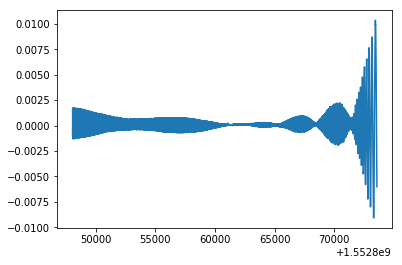

In [24]:
plt.plot(TBS,VBS)
plt.show()

In [25]:
Sig = np.fft.fft(VBS)
n = len(VBS)
timestep = 1 #second
freq = np.fft.fftfreq(n, d=timestep)


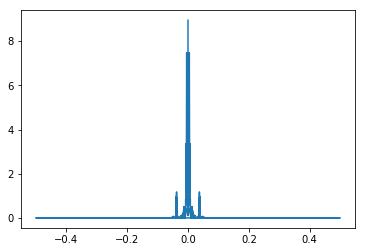

In [26]:
#%matplotlib notebook

plt.plot(freq,abs(Sig)**2)

In [27]:
Bound = [[-0.04,-0.034],[0.034,0.04]]
FILTERED = DataA.Filter(freq,abs(Sig)**2,Bound)


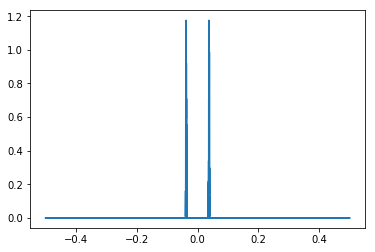

In [28]:
plt.plot(freq,FILTERED)

/Users/costassoler/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


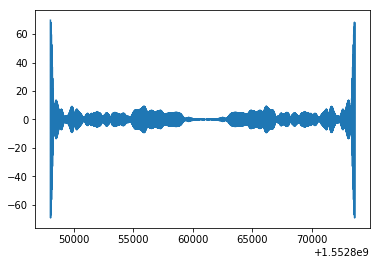

In [29]:
Sig_Filtered = np.fft.fft(FILTERED)
#Time = np.fft.fftfreq(freq)
T = TBS-TBS[0]

plt.plot(TBS,Sig_Filtered)

# Least Squares Fitting for Baseline

### Let's extract a small portion to only look at the high frequencies caused by baseling and dec:

In [83]:

LSFSignal = []
LSFTime = []
for i in range (0,len(TBS)):
    if (8250<T[i]) and (T[i]<8500):
        LSFTime.append(T[i]+TBS[0])
        LSFSignal.append(Sig_Filtered[i])
        
    

In [84]:
LSFTime

[1552856312.51284,
 1552856313.46695,
 1552856314.467162,
 1552856315.496018,
 1552856316.47001,
 1552856317.566162,
 1552856318.467032,
 1552856319.466889,
 1552856320.468035,
 1552856322.463983,
 1552856324.463867,
 1552856326.46915,
 1552856327.46698,
 1552856328.467059,
 1552856329.476676,
 1552856330.497324,
 1552856331.486897,
 1552856332.467215,
 1552856333.496645,
 1552856334.467118,
 1552856335.50411,
 1552856336.574936,
 1552856337.466918,
 1552856338.467066,
 1552856339.488433,
 1552856341.463831,
 1552856342.467245,
 1552856343.467305,
 1552856347.503678,
 1552856348.467226,
 1552856349.467131,
 1552856351.464064,
 1552856359.472007,
 1552856361.506537,
 1552856362.466945,
 1552856363.500698,
 1552856364.551747,
 1552856365.492559,
 1552856366.466907,
 1552856367.467132,
 1552856368.467074,
 1552856369.467363,
 1552856370.497183,
 1552856371.543943,
 1552856372.46754,
 1552856373.470371,
 1552856374.467325,
 1552856376.463868,
 1552856377.467039,
 1552856378.467026,
 155285

<IPython.core.display.Javascript object>


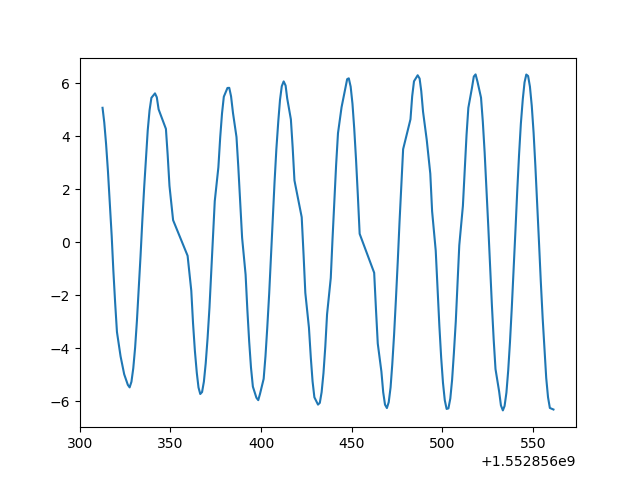

/Users/costassoler/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [145]:
plt.plot(np.array(LSFTime),np.array(LSFSignal))
plt.show()

In [146]:
np.array(LSFSignal)

array([ 5.07485781-2.41441559e-15j,  4.51814904-9.37612652e-16j,
        3.70434731-2.77506190e-15j,  2.67861223-2.33917676e-15j,
        1.49819499-1.52350712e-15j,  0.22924206-1.90106358e-15j,
       -1.056911  +9.15669786e-17j, -2.28774788-1.57816747e-15j,
       -3.39365705+9.77145969e-16j, -4.31186435-3.02565458e-16j,
       -4.98999074+2.32220839e-15j, -5.38903389-4.68561830e-16j,
       -5.48560407+1.32479091e-15j, -5.27328665-1.46916699e-15j,
       -4.76305209+3.22914165e-16j, -3.98268795+3.43020264e-15j,
       -2.97528233+2.89005558e-15j, -1.79684159+2.77412211e-15j,
       -0.51317429+1.22638646e-15j,  0.8037853 -2.00892844e-16j,
        2.08000859+3.63214972e-15j,  3.24353316+1.76848257e-15j,
        4.22851835-1.23876936e-15j,  4.97896785-6.44330886e-16j,
        5.4519086 -7.79794278e-16j,  5.61984605-5.86187575e-16j,
        5.47235559-1.24223269e-15j,  5.01671836+6.15792683e-16j,
        4.27756331-2.47963824e-15j,  3.29553268-1.67863466e-15j,
        2.12504373-3.0130

In [147]:
ha_init = -6*3600
ha_final = ha_init+len(VBS)
HA = np.arange(ha_init,ha_final)
import BaselineDec
            

## Trying Scipy:

In [148]:
def HA(Start,Data,FirstHa,Ra):
    '''
    Arguments: Data, FirstHa
    Data is your list of ifm timestamps, in unix time.
    FirstHa: the hour hangle of your source at the first timestamp
    (use an online converter to go from Unix time to PDT to LST to HA, 
    and Make sure this is in Radians!)
    Ra = source's right ascension
    '''
    L = []
    
    for i in range (0,len(Data)):
        Step = (Data[i]-Start)*np.pi/(12*3600)
        L.append(FirstHa+Step-Ha)
    return np.array(L)

In [149]:
FirstHa = (15*np.pi/12)+(10*np.pi/(12*60))+(59*np.pi/(12*3600))
Ha = (23*np.pi/12)+(47*np.pi/(12*60))+(40*np.pi/(12*3600))

In [150]:
Wee = HA(TBS[0],TBS,FirstHa,Ha)

In [151]:
X_Data = Wee
Y_Data = VBS
scipy.optimize.curve_fit(BaselineDec.FringeAmplitude,X_Data,Y_Data*100)
#FringeAmplitude(X_Data,B)

(array([1.25058365, 1.12305979]), array([[960.12901052, 368.73790235],
        [368.73790235, 141.61392807]]))

In [ ]:
%matplotlib notebook
plt.plot(Wee,BaselineDec.FringeAmplitude(X_Data,2.288,1.41))
plt.plot(Wee,VBS*100)

## Same Process, but with a small section:

In [92]:
np.abs(np.array(LSFSignal))

array([5.07485781, 4.51814904, 3.70434731, 2.67861223, 1.49819499,
       0.22924206, 1.056911  , 2.28774788, 3.39365705, 4.31186435,
       4.98999074, 5.38903389, 5.48560407, 5.27328665, 4.76305209,
       3.98268795, 2.97528233, 1.79684159, 0.51317429, 0.8037853 ,
       2.08000859, 3.24353316, 4.22851835, 4.97896785, 5.4519086 ,
       5.61984605, 5.47235559, 5.01671836, 4.27756331, 3.29553268,
       2.12504373, 0.83126983, 0.51349135, 1.83385998, 3.05560055,
       4.10979566, 4.93673242, 5.4892824 , 5.73558389, 5.66087405,
       5.26836576, 4.57911747, 3.63090081, 2.47612687, 1.17894533,
       0.18832307, 1.54922183, 2.82743674, 3.95107699, 4.85671916,
       5.49298664, 5.82346234, 5.82876984, 5.50770403, 4.87734561,
       3.97215057, 2.84206323, 1.54975645, 0.16715152, 1.22858855,
       2.55936922, 3.75053692, 4.73506898, 5.45734578, 5.87629266,
       5.96771421, 5.72568829, 5.16293965, 4.31017003, 3.21438001,
       1.93627453, 0.54689554, 0.87633135, 2.25391582, 3.50874

In [169]:
def Test(Data, A,B,C ):
    Out = []
    for i in range (0,len(Data)):
        F = A*np.sin(B*Data[i]+C)
        Out.append(F)
        
    return Out

def Test_function(Data,A,B,C):
    Y = A*np.cos(B*np.sin(Data)+C)
    return Y

In [170]:
X_Data = HA(TBS[0],LSFTime,FirstHa,Ha)
Y_Data = np.real(np.array(LSFSignal))
params,covar = scipy.optimize.curve_fit(Test_function,X_Data,Y_Data)
#FringeAmplitude(X_Data,B)

In [174]:
X_Data

array([-1.65442408, -1.6543547 , -1.65428196, -1.65420714, -1.65413631,
       -1.65405659, -1.65399108, -1.65391837, -1.65384556, -1.65370041,
       -1.65355498, -1.65340915, -1.65333659, -1.65326386, -1.65319044,
       -1.65311621, -1.65304425, -1.65297296, -1.6528981 , -1.65282752,
       -1.65275211, -1.65267424, -1.65260937, -1.65253664, -1.65246236,
       -1.65231871, -1.65224574, -1.65217301, -1.65187948, -1.65180941,
       -1.65173669, -1.65159147, -1.65100912, -1.65086116, -1.65079132,
       -1.65071614, -1.65063971, -1.65057129, -1.65050043, -1.65042769,
       -1.65035498, -1.65028223, -1.65020734, -1.65013122, -1.65006405,
       -1.64999113, -1.64991863, -1.64977343, -1.64970048, -1.64962776,
       -1.64955503, -1.64940894, -1.64933685, -1.64926415, -1.6491865 ,
       -1.64904621, -1.64897324, -1.64890055, -1.64882073, -1.64868027,
       -1.64860969, -1.64853691, -1.64846418, -1.6483882 , -1.64824627,
       -1.64817265, -1.64810062, -1.64795537, -1.64788246, -1.64

<IPython.core.display.Javascript object>


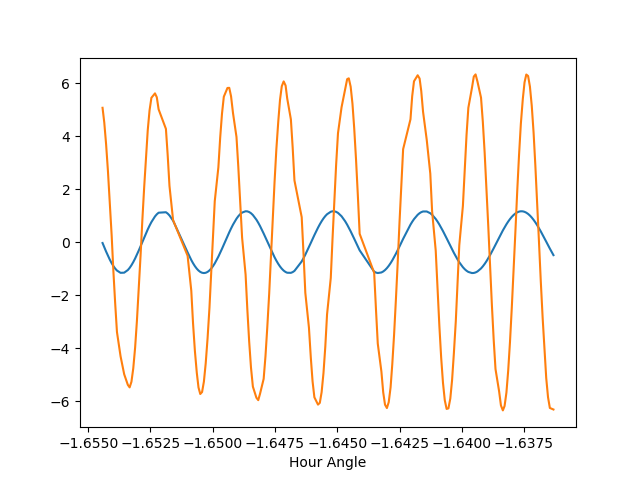

Text(0.5,0,'Hour Angle')

In [173]:
%matplotlib notebook
plt.plot(X_Data,Test_function(X_Data,params[0],params[1],params[2]))
plt.plot(X_Data,Y_Data)

plt.xlabel("Hour Angle")

In [142]:
#X = np.arange(0,20,0.1)
def Test_function(Data):
    Y = np.cos(A*np.sin(Data))
    return Y
#plt.plot(X_Data,Test_function(X_Data))
#print(X_Data)

In [143]:
params,covar = scipy.optimize.curve_fit(Test_function,X _Data,Y_Data)


SyntaxError: invalid syntax (<ipython-input-143-87d40d37632d>, line 1)

# Finding the Source Declination

In [140]:
params,covar = scipy.optimize.curve_fit(Test_function,X _Data,Y_Data)


ValueError: Unable to determine number of fit parameters.

In [ ]:
plt.plot(T-T[0],v_filtered)
plt.title('Signal vs Time')
plt.xlabel('Time (Seconds)')
plt.ylabel('Signal')

plt.savefig('SigVsTime.pdf')
plt.show()

# HANDOUT ATTEMPT:

In [258]:
A = np.empty((100,75), dtype=object)
Res = np.empty((100,75))
var = np.empty((100,75), dtype=object)
ewVals = np.linspace(15,20,100)
nsVals = np.linspace(0,1,75)
Y = VBS[0:100]
Y.shape = (-1,1)
hs = HA(TBS[0],TBS,FirstHa,Ha)[0:100]
d = np.pi/2 #GUESS for sun
L = 37.87*np.pi/180
for i in range (0,len(ewVals)):
    for j in range(0,len(nsVals)):
        Bew = ewVals[i]
        Bns = nsVals[j]
        lam = (3*10**8)/(10.7*10**9)
        Qew = Bew*np.cos(d)/lam
        Qns = Bns*np.sin(L)*np.cos(d)
        vT = Qew*np.sin(hs)+Qns*np.cos(hs)
        ATerm = np.cos(2*np.pi*vT)
        BTerm = np.sin(2*np.pi*vT)
        XT = np.vstack((ATerm,BTerm)) #gives you (Aterm1,Bterm1)RETURN(Aterm2,Bterm2) etc
        X = XT.T
        XX = np.dot(X.T,X)
        XY = np.dot(X.T,Y)
        XXI = np.linalg.inv(XX)
        a = np.dot(XXI,XY)
        A[i,j] = a

        YBAR = np.dot(X,a)
        DELY = Y-YBAR
        s_sq = np.dot(DELY.T, DELY)/(len(Y)-2)
        Res[i,j] = s_sq
        
   
        
        

In [259]:
np.where(Res==Res.min())

(array([0]), array([0]))

In [260]:
print(np.unravel_index(Res.argmin(), Res.shape))

(0, 0)


In [261]:
Res[0,73]

1.11922320196842e-06

In [262]:
Res.min()

1.1192231304052132e-06

In [263]:
Res[73,0]

1.1192231304052151e-06

In [256]:
Res.shape

(100, 75)

In [257]:
ewVals[73]

22.373737373737374